Name: **SHREYASH SAHARE**

Student ID: **110988918**

# **Statistical Modeling Techniques:**

## Data Preprocessing

In [17]:
lon_wknds = read.csv("london_weekends.csv")

In [18]:
head(lon_wknds)

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,121.1223,Private room,False,True,2,False,0,0,6,69,1,5.734117,0.4370940,222.8822,15.49341,470.0885,8.413765,-0.04975,51.52570
2,1,195.9124,Private room,False,True,2,False,1,0,10,96,1,4.788905,1.4640505,235.3858,16.36259,530.1335,9.488466,-0.08475,51.54210
3,2,193.3253,Private room,False,True,3,False,1,0,10,95,1,4.596677,0.4503062,268.9138,18.69325,548.9876,9.825922,-0.14585,51.54802
4,3,180.3899,Private room,False,True,2,False,1,0,9,87,1,2.054769,0.1326705,472.3813,32.83707,1021.2711,18.278973,-0.10611,51.52108
5,4,405.7010,Entire home/apt,False,False,3,False,0,1,7,65,0,4.491277,0.3541075,318.4915,22.13958,692.7754,12.399473,-0.18797,51.49399
6,5,354.1946,Entire home/apt,False,False,2,False,0,1,9,93,0,4.467894,0.3507494,321.8646,22.37406,703.0686,12.583702,-0.18805,51.49473


In [19]:
null_count <- colSums(is.na(lon_wknds))
print(null_count)

                         X                    realSum 
                         0                          0 
                 room_type                room_shared 
                         0                          0 
              room_private            person_capacity 
                         0                          0 
         host_is_superhost                      multi 
                         0                          0 
                       biz         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
                attr_index            attr_index_norm 
                         0                          0 
                rest_index            rest_index_norm 
                         0                          0 
          

Here we can see that there are no null values present in the dataset. Therefore, there is no need to clean the dataset.

In [20]:
names(lon_wknds)

[1] "X"                          "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"

In [21]:
# installing and importing the required packages
install.packages("corrplot")
library(ggplot2)
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
lon_wknds <- data.frame(lon_wknds)

In [23]:
head(lon_wknds)

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,121.1223,Private room,False,True,2,False,0,0,6,69,1,5.734117,0.4370940,222.8822,15.49341,470.0885,8.413765,-0.04975,51.52570
2,1,195.9124,Private room,False,True,2,False,1,0,10,96,1,4.788905,1.4640505,235.3858,16.36259,530.1335,9.488466,-0.08475,51.54210
3,2,193.3253,Private room,False,True,3,False,1,0,10,95,1,4.596677,0.4503062,268.9138,18.69325,548.9876,9.825922,-0.14585,51.54802
4,3,180.3899,Private room,False,True,2,False,1,0,9,87,1,2.054769,0.1326705,472.3813,32.83707,1021.2711,18.278973,-0.10611,51.52108
5,4,405.7010,Entire home/apt,False,False,3,False,0,1,7,65,0,4.491277,0.3541075,318.4915,22.13958,692.7754,12.399473,-0.18797,51.49399
6,5,354.1946,Entire home/apt,False,False,2,False,0,1,9,93,0,4.467894,0.3507494,321.8646,22.37406,703.0686,12.583702,-0.18805,51.49473


In [24]:
# checking the number of unique values in non-numeric columns
unique_values_1 <- unique(lon_wknds$room_type)
num_unique_1 <- length(unique_values_1)

unique_values_2 <- unique(lon_wknds$room_private)
num_unique_2 <- length(unique_values_2)

unique_values_3 <- unique(lon_wknds$room_shared)
num_unique_3 <- length(unique_values_3)

In [25]:
cat("Number of unique values in room_type: ", num_unique_1, "\n")
cat("Number of unique values in room_private: ", num_unique_2, "\n")
cat("Number of unique values in room_shared: ", num_unique_3)

Number of unique values in room_type:  3 
Number of unique values in room_private:  2 
Number of unique values in room_shared:  2

In [26]:
unique_values_1

[1] "Private room"    "Entire home/apt" "Shared room"

In [27]:
lon_wknds$room_type_encoded <- as.numeric(factor(lon_wknds$room_type, levels = c('Private room', 'Entire home/apt', 'Shared room')))

# Check the result
head(lon_wknds$room_type_encoded)

[1] 1 1 1 1 2 2

In a similar way, we encode the columns "room_shared", "room_private" and "host_is_superhost" in order to check the correlation between the attributes in the dataset.

In [28]:
lon_wknds$room_private_encoded <- as.numeric(factor(lon_wknds$room_private, levels = c('True', 'False')))
lon_wknds$room_shared_encoded <- as.numeric(factor(lon_wknds$room_shared, levels = c('True', 'False')))
lon_wknds$room_host_encoded <- as.numeric(factor(lon_wknds$host_is_superhost, levels = c('True', 'False')))

In [29]:
head(lon_wknds)

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,room_type_encoded,room_private_encoded,room_shared_encoded,room_host_encoded
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,121.1223,Private room,False,True,2,False,0,0,6,⋯,222.8822,15.49341,470.0885,8.413765,-0.04975,51.52570,1,1,2,2
2,1,195.9124,Private room,False,True,2,False,1,0,10,⋯,235.3858,16.36259,530.1335,9.488466,-0.08475,51.54210,1,1,2,2
3,2,193.3253,Private room,False,True,3,False,1,0,10,⋯,268.9138,18.69325,548.9876,9.825922,-0.14585,51.54802,1,1,2,2
4,3,180.3899,Private room,False,True,2,False,1,0,9,⋯,472.3813,32.83707,1021.2711,18.278973,-0.10611,51.52108,1,1,2,2
5,4,405.7010,Entire home/apt,False,False,3,False,0,1,7,⋯,318.4915,22.13958,692.7754,12.399473,-0.18797,51.49399,2,2,2,2
6,5,354.1946,Entire home/apt,False,False,2,False,0,1,9,⋯,321.8646,22.37406,703.0686,12.583702,-0.18805,51.49473,2,2,2,2


In [30]:
# keeping the columns best suitable to predict the price of Airbnb listing
lon_wknds <- subset(lon_wknds, select = -c(room_type, room_private, room_shared, host_is_superhost, X, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat))
head(lon_wknds)

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,room_type_encoded,room_private_encoded,room_shared_encoded,room_host_encoded
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,121.1223,2,0,0,6,69,1,5.734117,0.4370940,1,1,2,2
2,195.9124,2,1,0,10,96,1,4.788905,1.4640505,1,1,2,2
3,193.3253,3,1,0,10,95,1,4.596677,0.4503062,1,1,2,2
4,180.3899,2,1,0,9,87,1,2.054769,0.1326705,1,1,2,2
5,405.7010,3,0,1,7,65,0,4.491277,0.3541075,2,2,2,2
6,354.1946,2,0,1,9,93,0,4.467894,0.3507494,2,2,2,2


In [31]:
#training and test set
set.seed(1111)
n = floor(0.8 * nrow(lon_wknds)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(lon_wknds)), size = n) #randomly sample indicies to be included in the training set

train = lon_wknds[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = lon_wknds[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.")  #check the dimensions

There are 4303 rows and 13 columns in the training set. There are 1076 rows and 13 columns in the testing set.

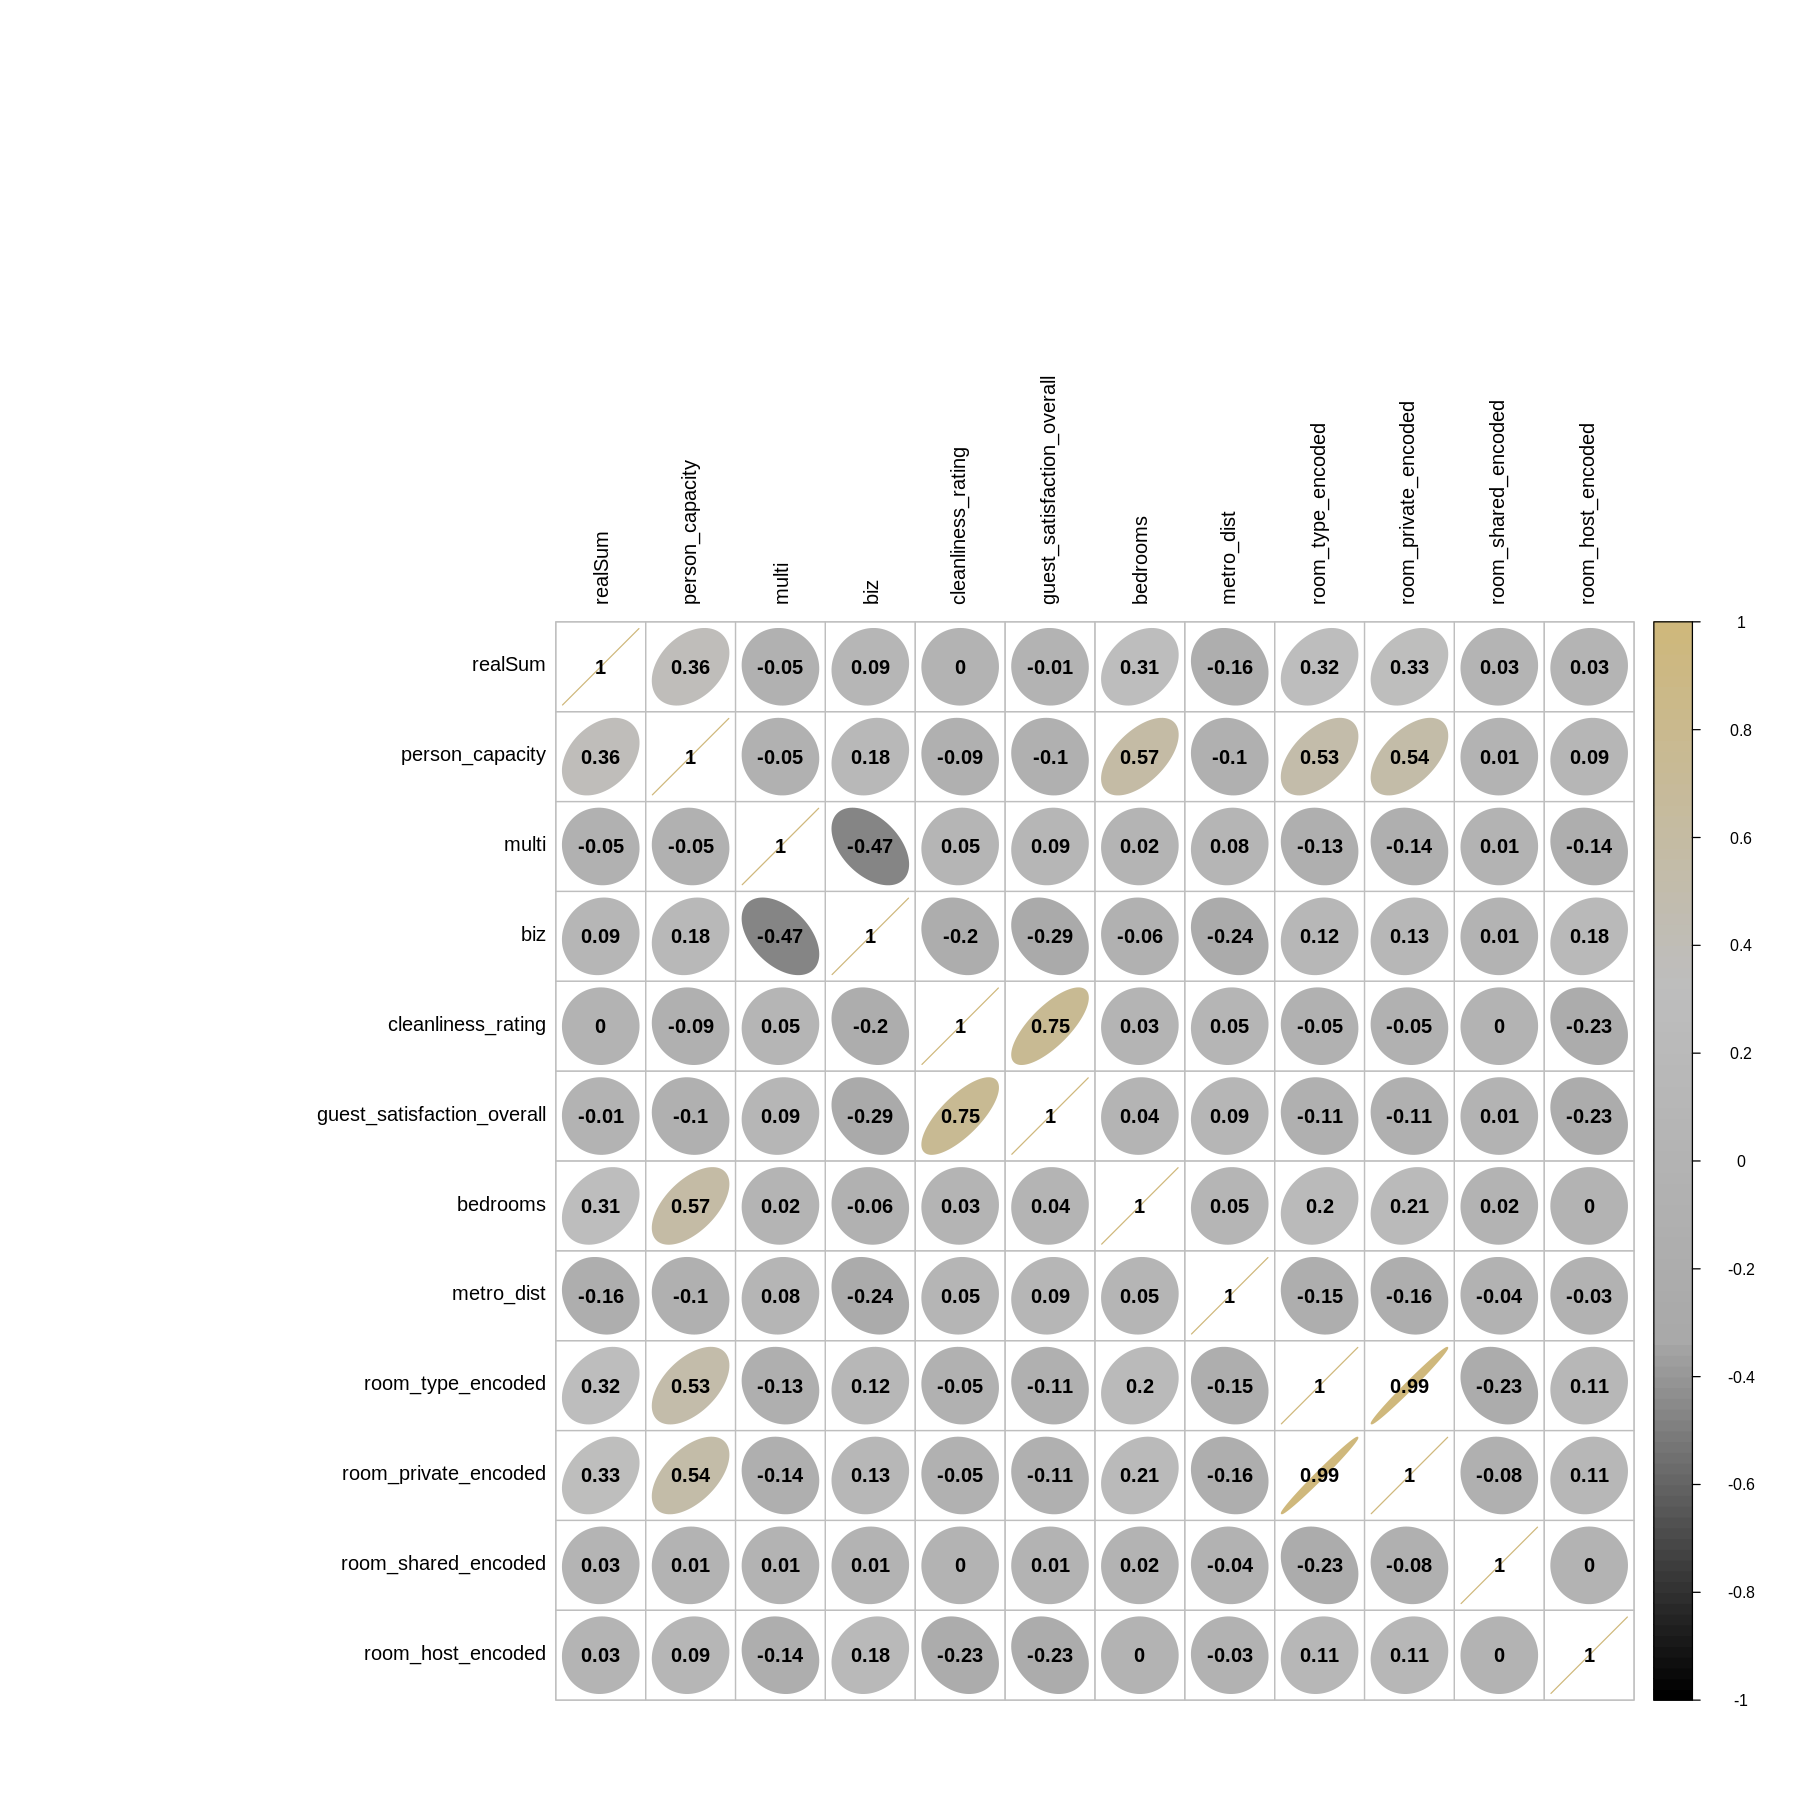

In [68]:
# generating a correlation plot
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(train[,-8]), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

## Regression Modeling

In [33]:
# fitting a multiple linear regression model
model_wknds <- lm(realSum ~ ., data = train)

summary(model_wknds)


Call:
lm(formula = realSum ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
 -932.4  -105.6   -38.5    43.7 12740.5 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -191.1881    78.1570  -2.446  0.01448 *  
person_capacity              40.3261     7.4466   5.415 6.45e-08 ***
multi                        -0.9893    16.0066  -0.062  0.95072    
biz                          14.3408    16.4034   0.874  0.38203    
cleanliness_rating            5.4522     8.2624   0.660  0.50936    
guest_satisfaction_overall    0.8339     0.8541   0.976  0.32898    
bedrooms                    168.8604    13.6456  12.375  < 2e-16 ***
dist                        -28.2780     3.3129  -8.536  < 2e-16 ***
metro_dist                   -2.2541     6.9431  -0.325  0.74545    
room_type_encoded          -257.3392    84.4595  -3.047  0.00233 ** 
room_private_encoded        445.6634    87.5

In [34]:
# checking the coefficients for the MLR model
coeff_wknds <- coef(model_wknds)
print(coeff_wknds)

               (Intercept)            person_capacity 
              -191.1880583                 40.3261107 
                     multi                        biz 
                -0.9893159                 14.3408212 
        cleanliness_rating guest_satisfaction_overall 
                 5.4522454                  0.8338866 
                  bedrooms                       dist 
               168.8604274                -28.2780164 
                metro_dist          room_type_encoded 
                -2.2541405               -257.3391547 
      room_private_encoded        room_shared_encoded 
               445.6634414                         NA 
         room_host_encoded 
                -1.2151846 


It can be observed from the above result that the column "room_shared_encoded" has "NA" value as the coefficient. This means that the aforementioned variable was not included in the model as a predictor. Therefore, we need to assess the model fitting process and the model diagnostics to understand and determine the reason for this result.

## Diagnostics of the Model

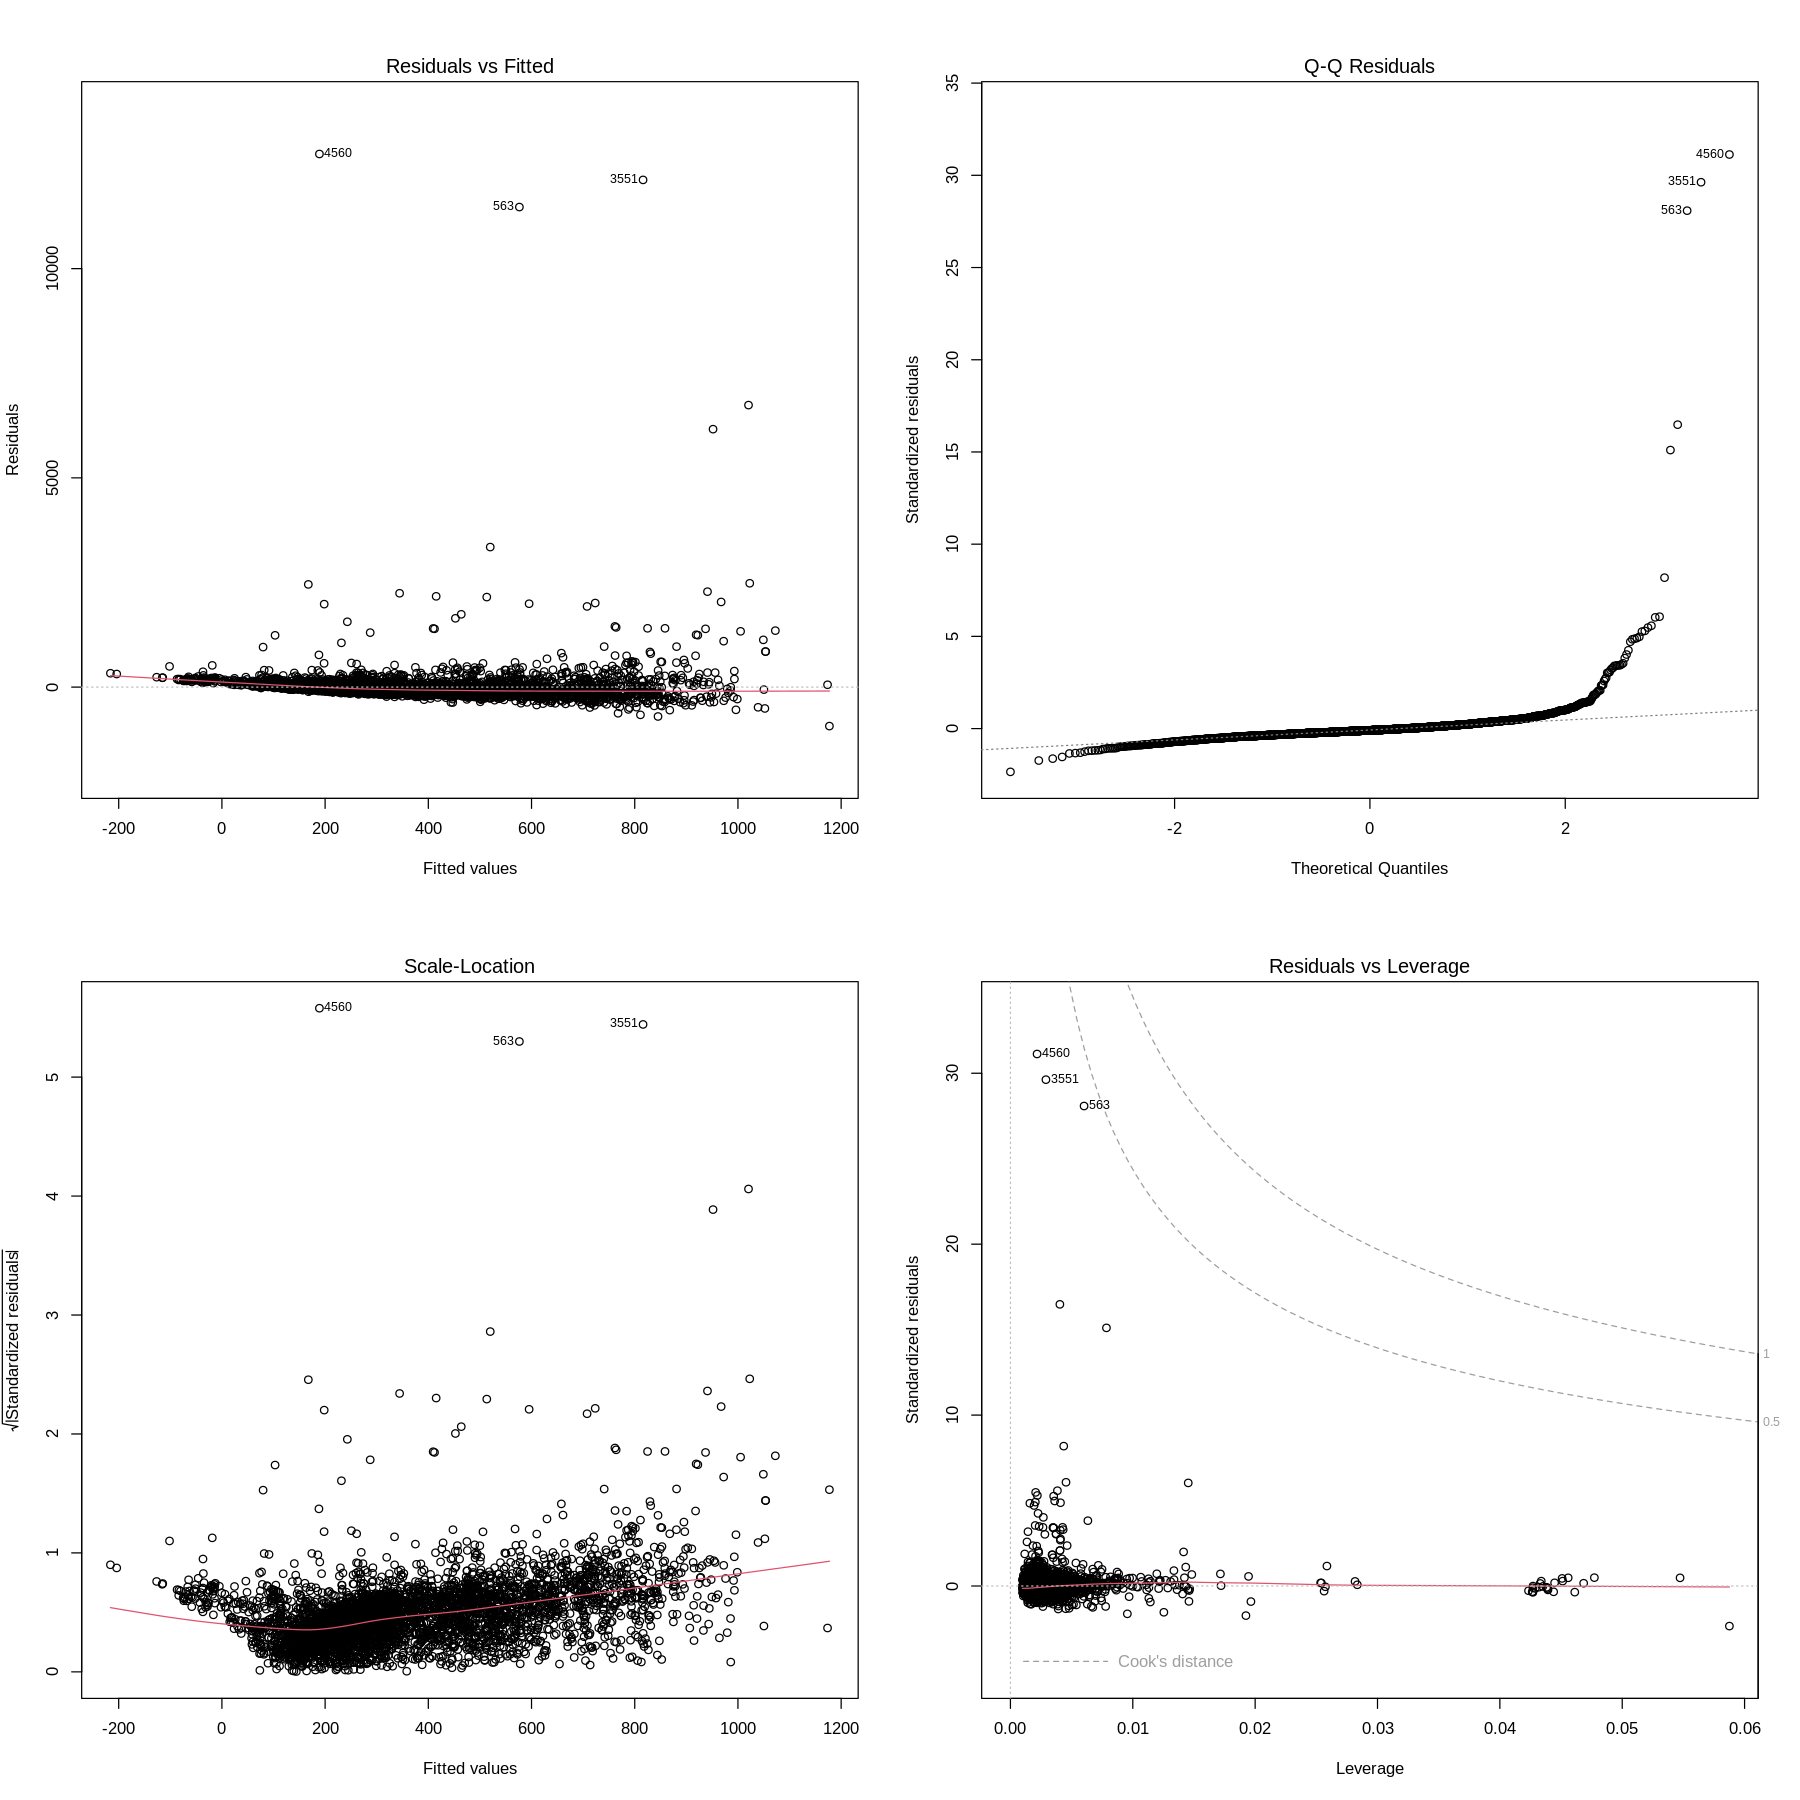

In [35]:
# diagnostic to check modeling assumptions
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow = c(2, 2))
plot(model_wknds)

In [36]:
# plotting the diagnostics
train.diagnostics = data.frame(yhat = fitted(model_wknds), r = resid(model_wknds), y = train$realSum, multi = train$multi, clean = train$cleanliness_rating, bedr = train$bedrooms, metro = train$metro_dist,
                               room_priv = train$room_private_encoded, room_shared = train$room_shared_encoded, room_host = train$room_host_encoded, per_cap = train$person_capacity,
                               biz = train$biz, guest = train$guest_satisfaction_overall, dist = train$dist, room_type = train$room_type_encoded)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


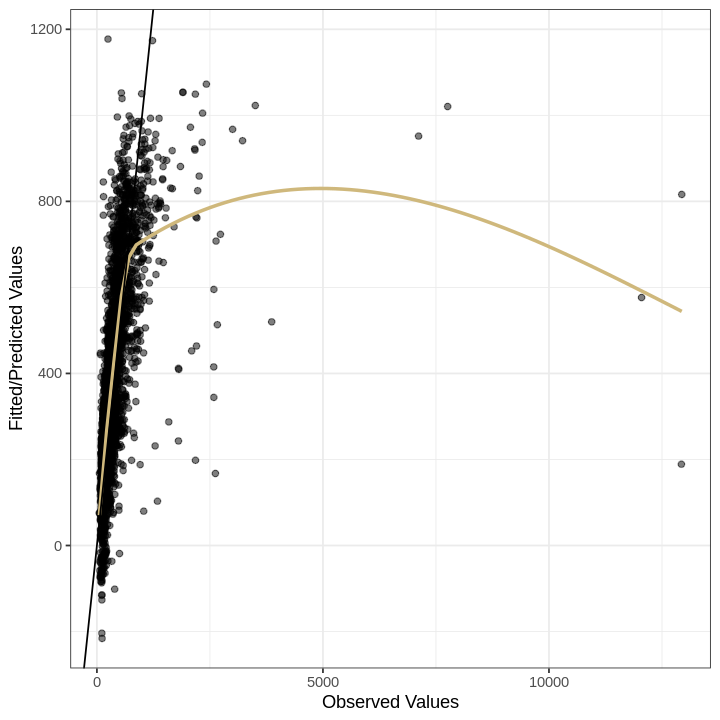

In [37]:
library(ggplot2)

options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(train.diagnostics, aes(x = y, y = yhat)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()

It can be observed from the diagnostic plots that there are outliers present in the dataset that are potentially high leverage and highly influential points (563, 3551, 4560). Apart from those outliers, the other data points are almost equally distributed about the regression line (red line). Therefore, we can first transform the data using the `cube root` transformation and then remove the above points from the dataset and re-fit the regression model to check for modeling assumptions.

In [38]:
# Apply cube root transformation to numerical columns
train_transformed <- train
numeric_columns <- sapply(train, is.numeric)
train_transformed[, numeric_columns] <- lapply(train[, numeric_columns], function(x) x^(1/3))

head(train_transformed)

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,room_type_encoded,room_private_encoded,room_shared_encoded,room_host_encoded
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2486,6.143718,1.259921,1,0,2.154435,4.610436,1.000000,1.716709,0.9426778,1.000000,1.000000,1.259921,1.000000
2098,6.658150,1.259921,0,0,2.154435,4.530655,1.000000,1.532372,0.6270202,1.259921,1.259921,1.259921,1.259921
794,5.441298,1.259921,0,1,2.080084,4.447960,1.000000,1.410488,0.7628583,1.000000,1.000000,1.259921,1.259921
326,7.534999,1.709976,0,0,2.154435,4.610436,1.259921,2.144817,1.6858148,1.259921,1.259921,1.259921,1.259921
3034,6.421726,1.587401,0,0,2.080084,4.447960,1.000000,1.717102,0.6967246,1.259921,1.259921,1.259921,1.259921
991,6.647522,1.259921,0,1,2.000000,4.362071,0.000000,1.654753,0.6929410,1.259921,1.259921,1.259921,1.259921


In [39]:
print(colSums(is.na(train_transformed)))

                   realSum            person_capacity 
                         0                          0 
                     multi                        biz 
                         0                          0 
        cleanliness_rating guest_satisfaction_overall 
                         0                          0 
                  bedrooms                       dist 
                         0                          0 
                metro_dist          room_type_encoded 
                         0                          0 
      room_private_encoded        room_shared_encoded 
                         0                          0 
         room_host_encoded 
                         0 


In [40]:
# points to be removed
points_rem <- c(563, 3551, 4560)

In [41]:
# Remove the specified points from the dataset using subsetting
train_new <- train_transformed[!rownames(train_transformed) %in% points_rem, ]

# Check if the specified points are removed
if (nrow(train_new) == (nrow(train_transformed) - length(points_rem))) {
  print("Specified points have been successfully removed.")
} else {
  print("Some specified points may not have been removed.")
}

[1] "Specified points have been successfully removed."


In [42]:
model_wknds_new <- lm(realSum ~ ., data = train_new)
summary(model_wknds_new)


Call:
lm(formula = realSum ~ ., data = train_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2164 -0.5493 -0.1542  0.3779 10.3796 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.19848    0.43425  -5.063 4.31e-07 ***
person_capacity              2.23080    0.10407  21.437  < 2e-16 ***
multi                        0.09173    0.03606   2.544  0.01099 *  
biz                          0.10392    0.03692   2.815  0.00491 ** 
cleanliness_rating           0.93359    0.20238   4.613 4.08e-06 ***
guest_satisfaction_overall  -0.02058    0.09415  -0.219  0.82701    
bedrooms                     0.66799    0.05388  12.397  < 2e-16 ***
dist                        -1.20667    0.06017 -20.055  < 2e-16 ***
metro_dist                  -0.36251    0.05915  -6.129 9.66e-10 ***
room_type_encoded          -11.05698    1.04322 -10.599  < 2e-16 ***
room_private_encoded        16.46261    

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


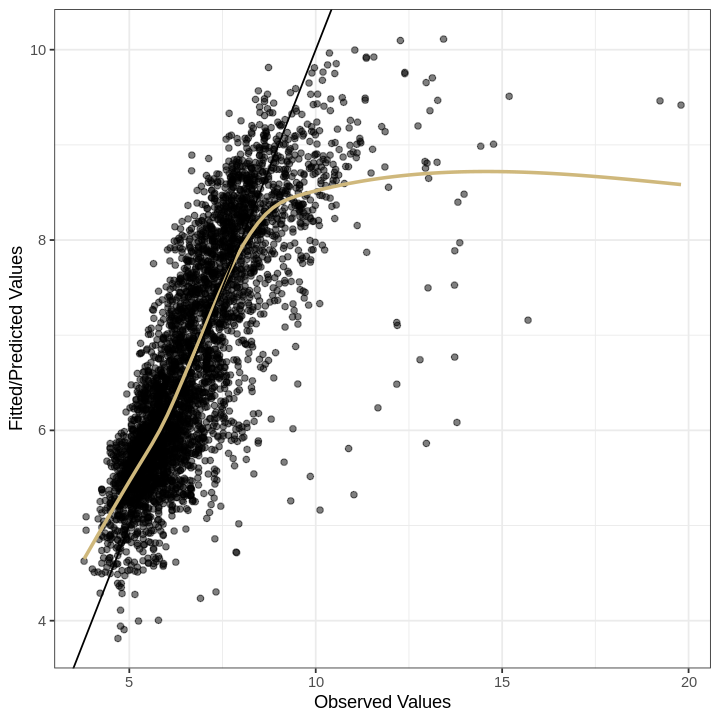

In [43]:
# rechecking the diagnostics
train_new.diagnostics = data.frame(yhat = fitted(model_wknds_new), r = resid(model_wknds_new), y = train_new$realSum, multi = train_new$multi, clean = train_new$cleanliness_rating, bedr = train_new$bedrooms, metro = train_new$metro_dist,
                               room_priv = train_new$room_private_encoded, room_shared = train_new$room_shared_encoded, room_host = train_new$room_host_encoded, per_cap = train_new$person_capacity,
                               biz = train_new$biz, guest = train_new$guest_satisfaction_overall, dist = train_new$dist, room_type = train_new$room_type_encoded)

options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(train_new.diagnostics, aes(x = y, y = yhat)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()

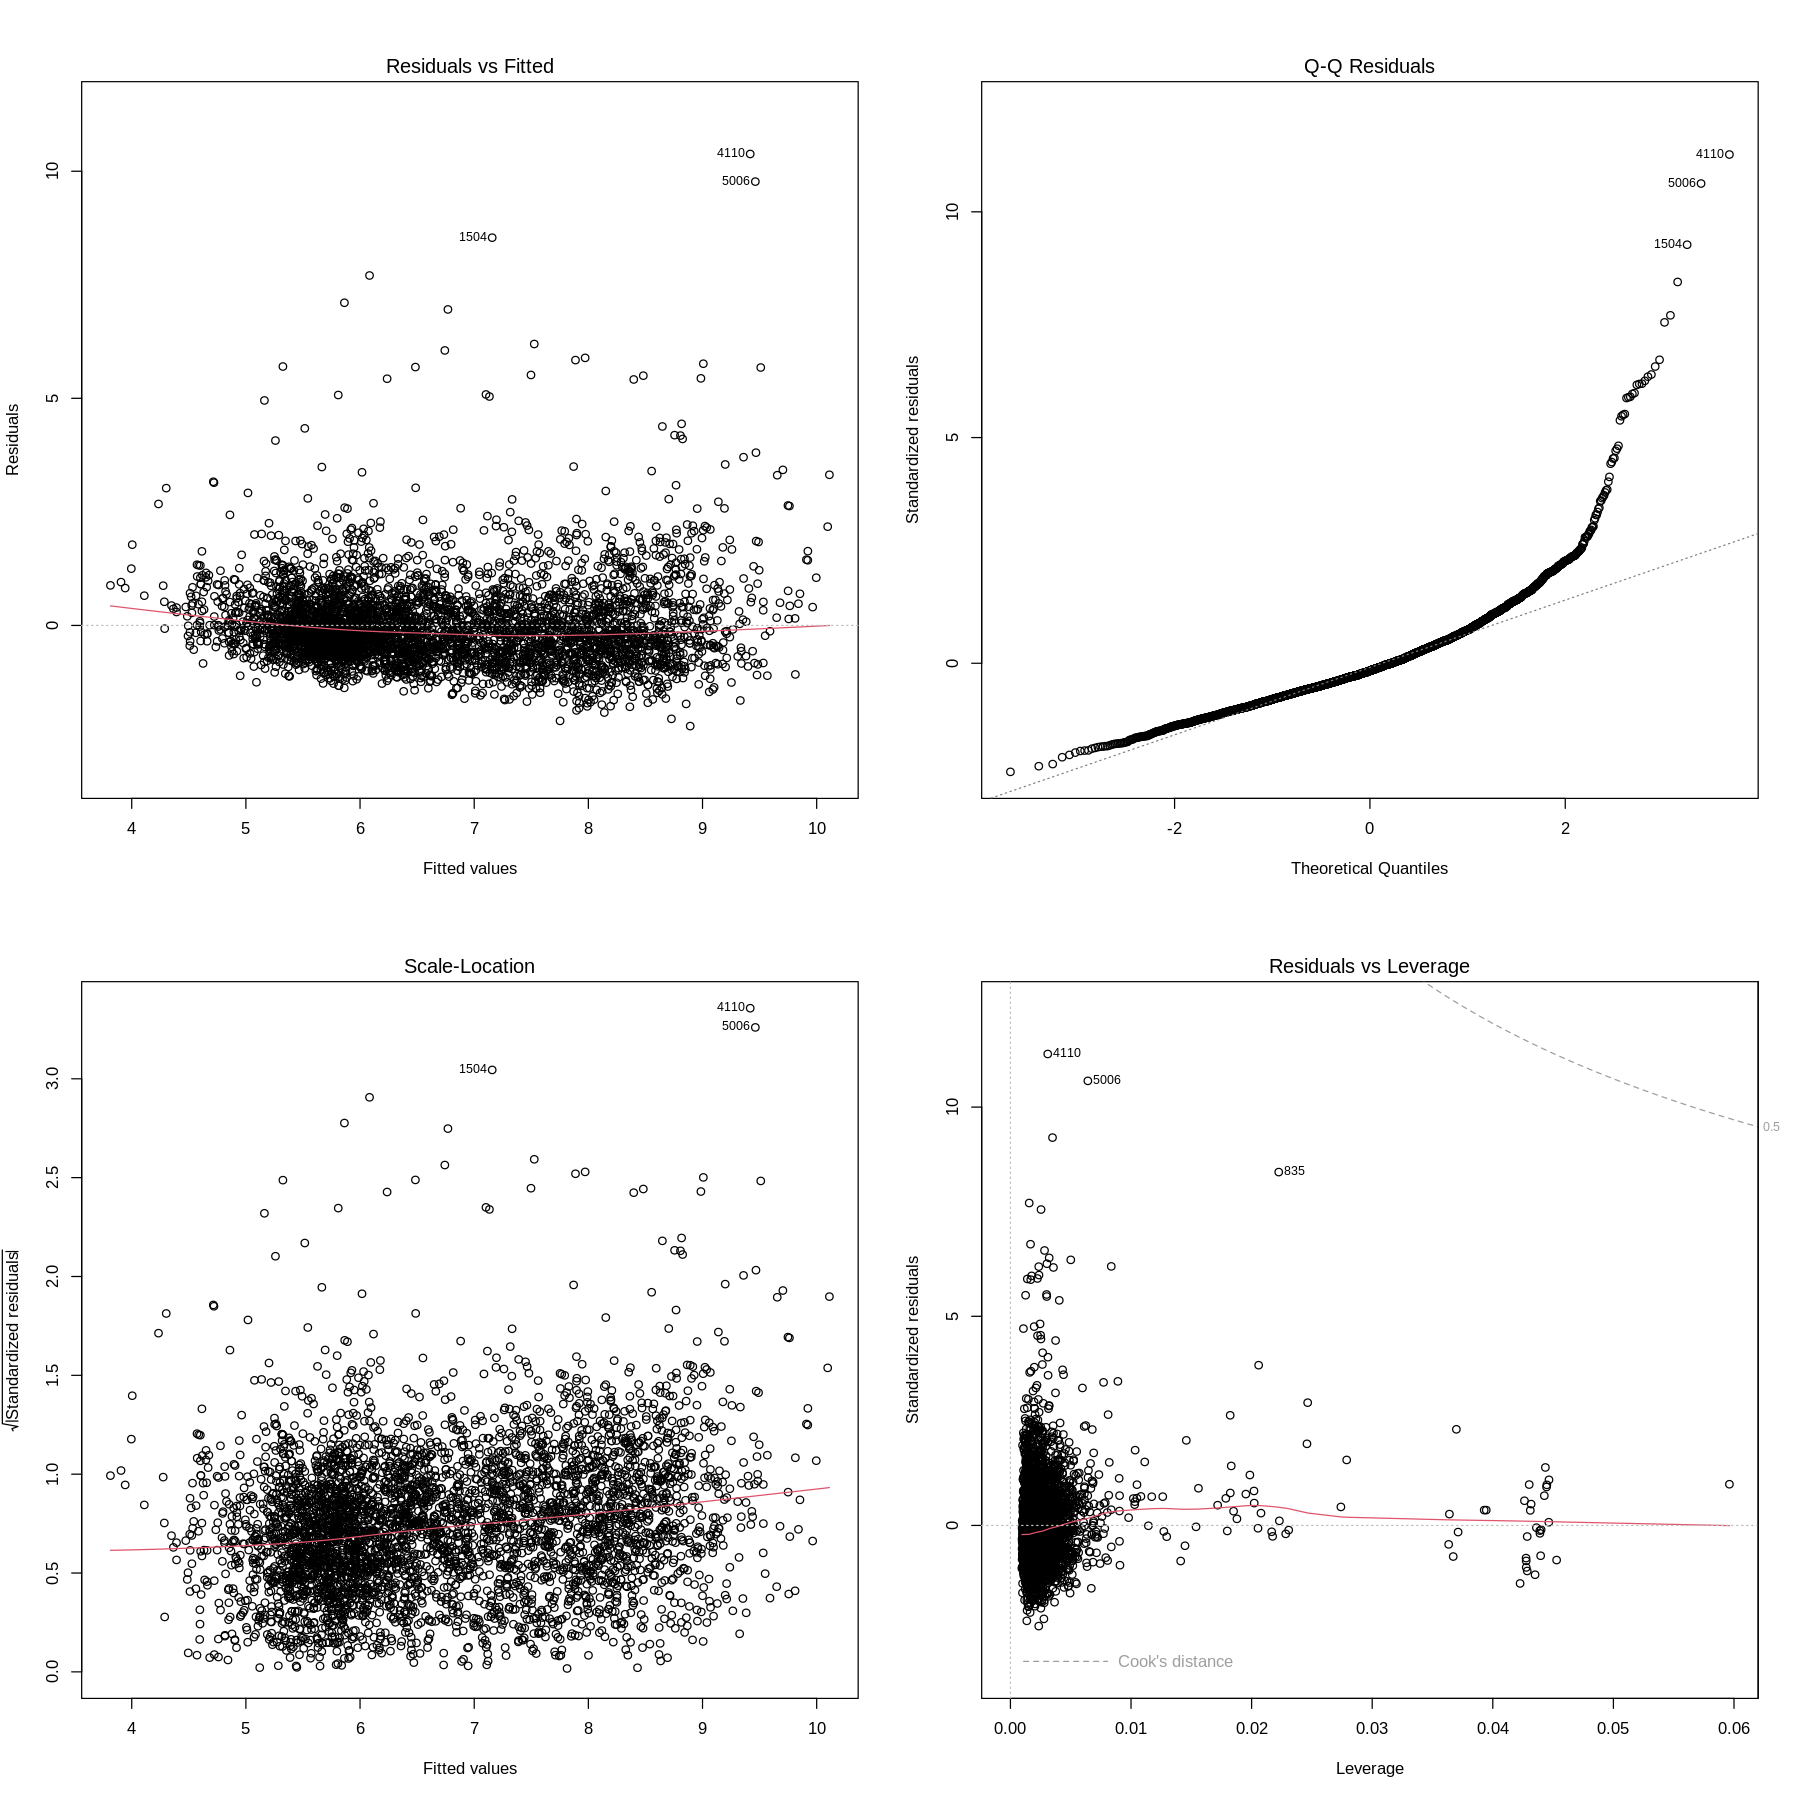

In [44]:
# re-plotting the diagnostics to check modeling assumptions
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow = c(2, 2))
plot(model_wknds_new)

We keep removing the outliers till we have an even distribution of data around the regression line (red line) in all the plots.

In [45]:
# points to be removed
points_rem <- c(1504, 4110, 5006)

In [46]:
# Remove the specified points from the dataset using subsetting
train_new_1 <- train_new[!rownames(train_new) %in% points_rem, ]

# Check if the specified points are removed
if (nrow(train_new_1) == (nrow(train_new) - length(points_rem))) {
  print("Specified points have been successfully removed.")
} else {
  print("Some specified points may not have been removed.")
}

[1] "Specified points have been successfully removed."


In [47]:
# re-fitting the model
model_wknds_new <- lm(realSum ~ ., data = train_new_1)
summary(model_wknds_new)


Call:
lm(formula = realSum ~ ., data = train_new_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1929 -0.5450 -0.1495  0.3843  7.6468 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.13224    0.41775  -5.104 3.47e-07 ***
person_capacity              2.25920    0.10019  22.549  < 2e-16 ***
multi                        0.08993    0.03469   2.592  0.00957 ** 
biz                          0.10397    0.03553   2.927  0.00344 ** 
cleanliness_rating           0.91524    0.19460   4.703 2.64e-06 ***
guest_satisfaction_overall  -0.02912    0.09054  -0.322  0.74778    
bedrooms                     0.63023    0.05186  12.152  < 2e-16 ***
dist                        -1.17005    0.05796 -20.185  < 2e-16 ***
metro_dist                  -0.37003    0.05690  -6.503 8.79e-11 ***
room_type_encoded          -10.95832    1.00314 -10.924  < 2e-16 ***
room_private_encoded        16.28556  

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


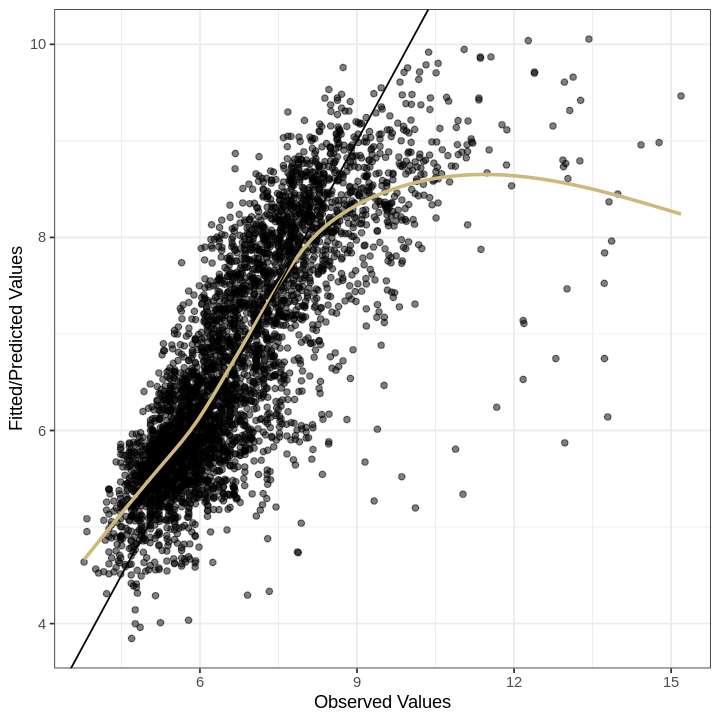

In [48]:
# rechecking the diagnostics
train_new.diagnostics = data.frame(yhat = fitted(model_wknds_new), r = resid(model_wknds_new), y = train_new_1$realSum, multi = train_new_1$multi, clean = train_new_1$cleanliness_rating, bedr = train_new_1$bedrooms, metro = train_new_1$metro_dist,
                               room_priv = train_new_1$room_private_encoded, room_shared = train_new_1$room_shared_encoded, room_host = train_new_1$room_host_encoded, per_cap = train_new_1$person_capacity,
                               biz = train_new_1$biz, guest = train_new_1$guest_satisfaction_overall, dist = train_new_1$dist, room_type = train_new_1$room_type_encoded)

options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(train_new.diagnostics, aes(x = y, y = yhat)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()

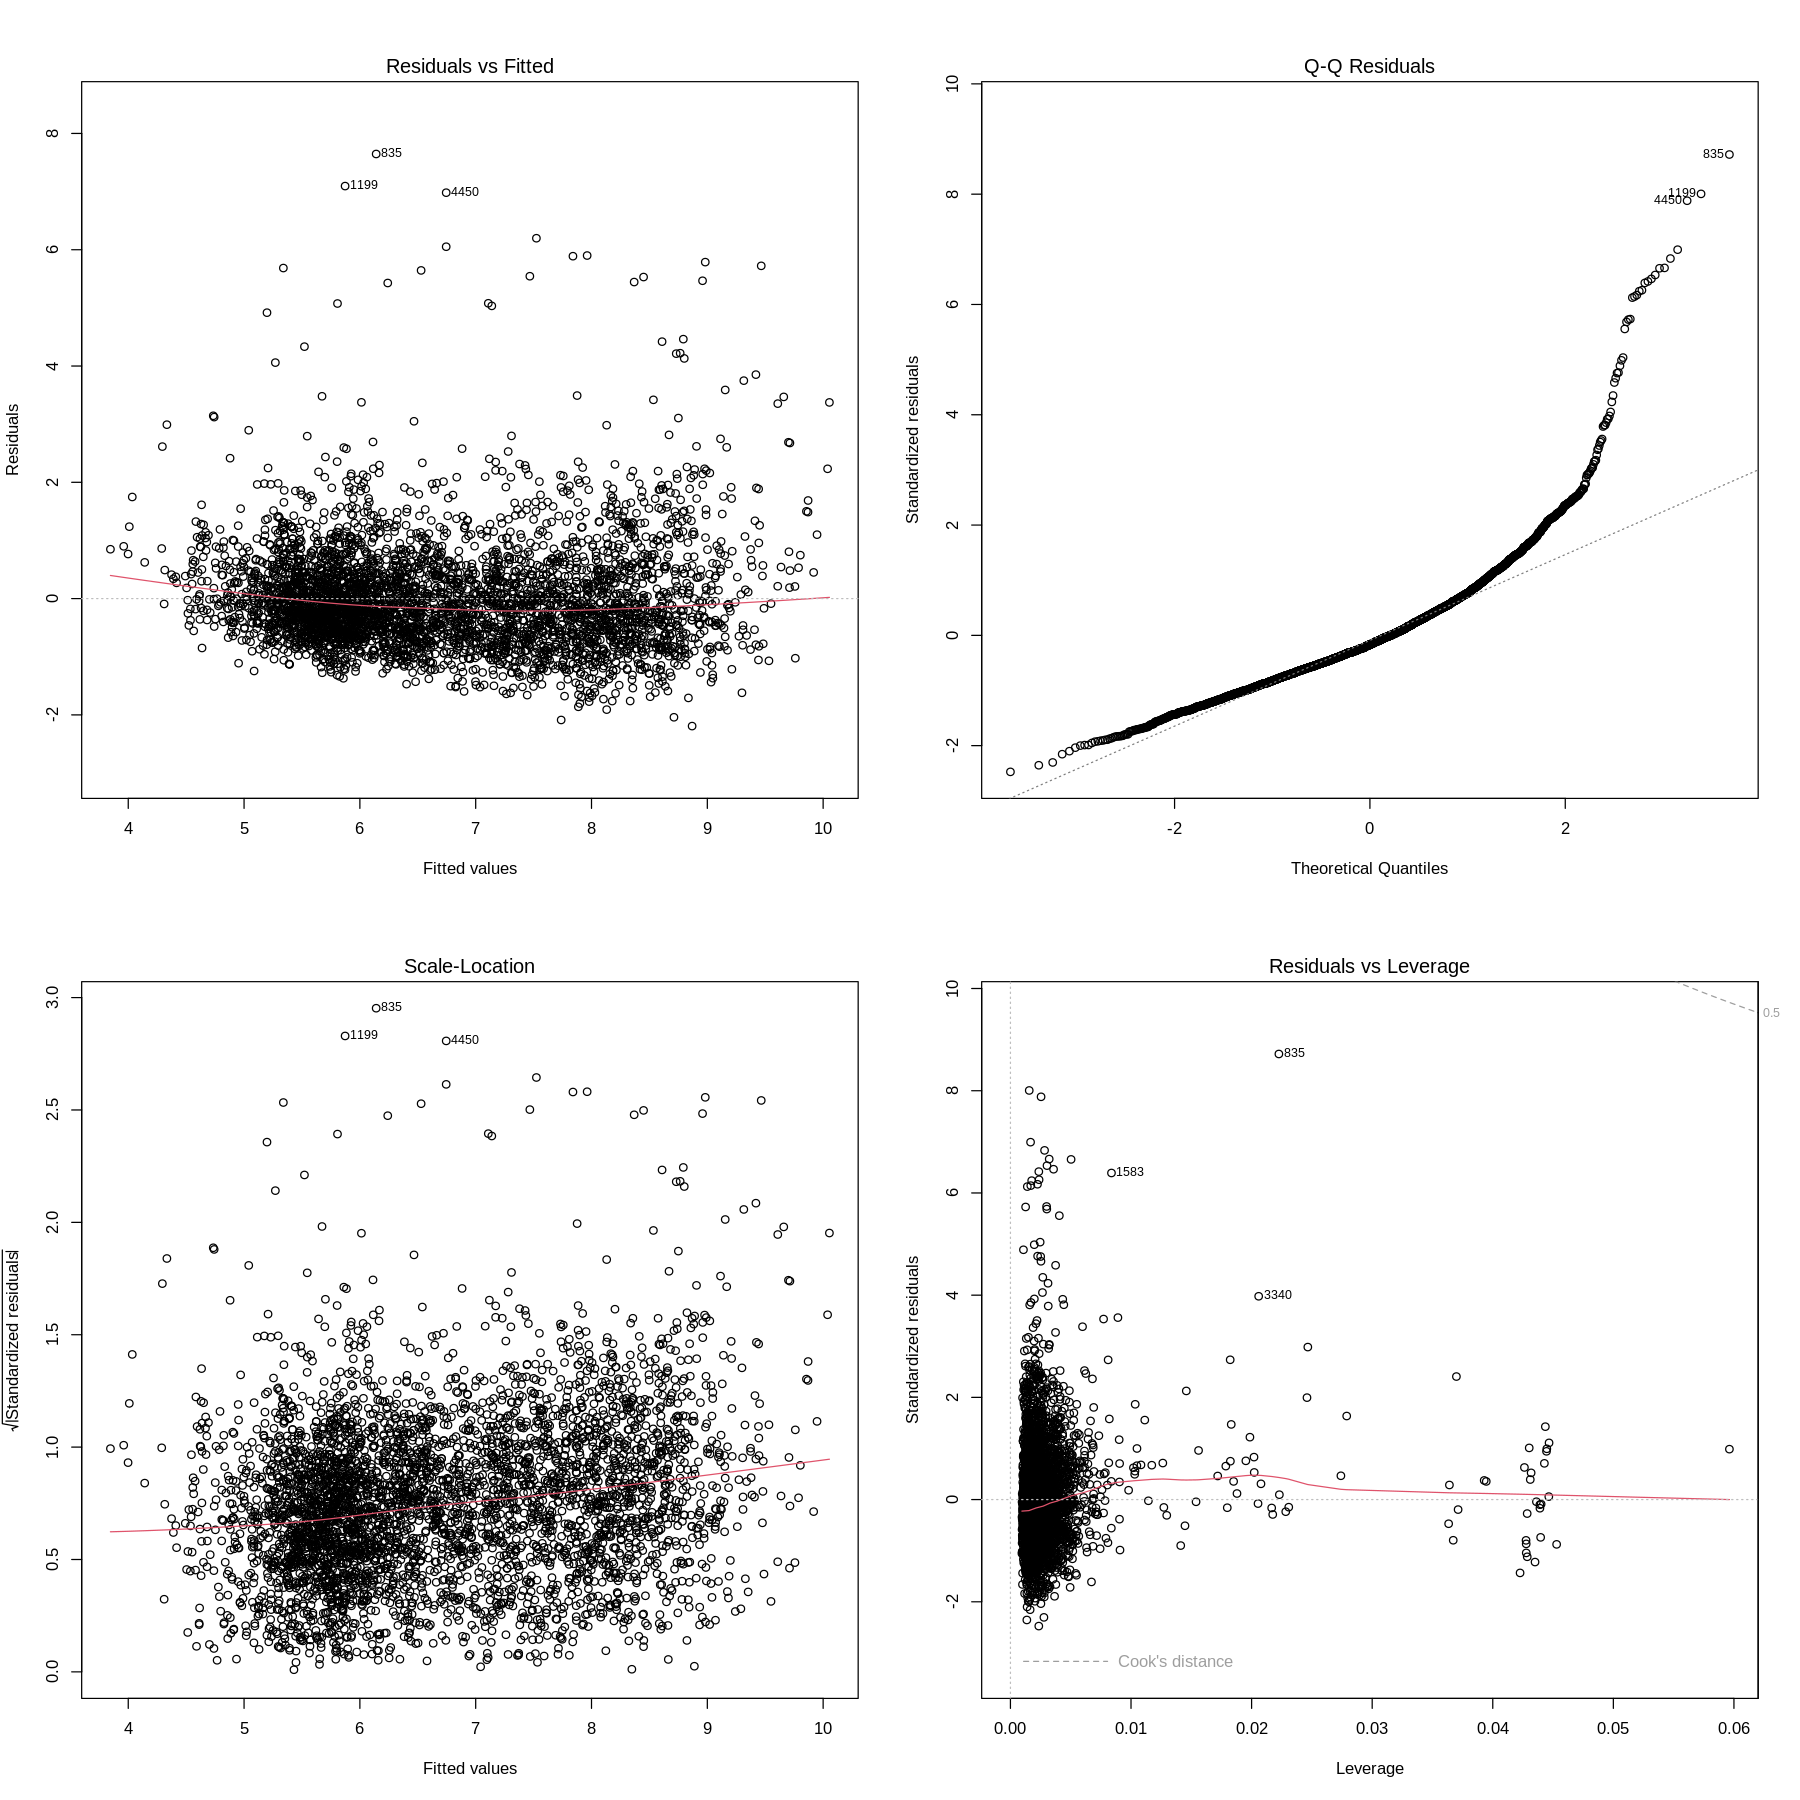

In [49]:
# re-plotting the diagnostics to check modeling assumptions
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow = c(2, 2))
plot(model_wknds_new)

From the above diagnostic plots, it is observed that it is following all the modeling assumptions almost perfectly for a dataset with large number of data points. Notably, there are no high leverage points in the dataset since all the points are well within `Cook's Distance`. Therefore, we can now proceed with model selection.

## Model Selection

We can now select the best model according to various methods. This can be fulfilled by using two types of selection techniques:

1. **Backward Selection:** Using MSPE as a criterion

2. **Forward Selection:** Using AIC, BIC and $R_a^2$ criteria.

### Backward Selection

For this dataset, let us keep the $α_{crit} = 0.01$

In [50]:
model_wknds_new <- lm(realSum ~ ., data = train_new_1)
summary(model_wknds_new)


Call:
lm(formula = realSum ~ ., data = train_new_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1929 -0.5450 -0.1495  0.3843  7.6468 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.13224    0.41775  -5.104 3.47e-07 ***
person_capacity              2.25920    0.10019  22.549  < 2e-16 ***
multi                        0.08993    0.03469   2.592  0.00957 ** 
biz                          0.10397    0.03553   2.927  0.00344 ** 
cleanliness_rating           0.91524    0.19460   4.703 2.64e-06 ***
guest_satisfaction_overall  -0.02912    0.09054  -0.322  0.74778    
bedrooms                     0.63023    0.05186  12.152  < 2e-16 ***
dist                        -1.17005    0.05796 -20.185  < 2e-16 ***
metro_dist                  -0.37003    0.05690  -6.503 8.79e-11 ***
room_type_encoded          -10.95832    1.00314 -10.924  < 2e-16 ***
room_private_encoded        16.28556  

In [51]:
# first update
model_wknds_new <- update(model_wknds_new, . ~ . -guest_satisfaction_overall)
predicted_values <- predict(model_wknds_new, newdata = test)
mspe_1 <- mean((test$realSum - predicted_values)^2)
summary(model_wknds_new)

Warning message in predict.lm(model_wknds_new, newdata = test):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”



Call:
lm(formula = realSum ~ person_capacity + multi + biz + cleanliness_rating + 
    bedrooms + dist + metro_dist + room_type_encoded + room_private_encoded + 
    room_shared_encoded + room_host_encoded, data = train_new_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1925 -0.5441 -0.1492  0.3844  7.6609 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.17503    0.39596  -5.493 4.18e-08 ***
person_capacity        2.25859    0.10016  22.550  < 2e-16 ***
multi                  0.09041    0.03466   2.609  0.00912 ** 
biz                    0.10586    0.03503   3.021  0.00253 ** 
cleanliness_rating     0.87029    0.13537   6.429 1.43e-10 ***
bedrooms               0.62989    0.05185  12.149  < 2e-16 ***
dist                  -1.16944    0.05793 -20.188  < 2e-16 ***
metro_dist            -0.37072    0.05686  -6.520 7.83e-11 ***
room_type_encoded    -10.95671    1.00302 -10.924  < 2e

In [52]:
# second update
model_wknds_new <- update(model_wknds_new, . ~ . -room_host_encoded)
predicted_values_1 <- predict(model_wknds_new, newdata = test)
mspe_2 <- mean((test$realSum - predicted_values_1)^2)
summary(model_wknds_new)

Warning message in predict.lm(model_wknds_new, newdata = test):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”



Call:
lm(formula = realSum ~ person_capacity + multi + biz + cleanliness_rating + 
    bedrooms + dist + metro_dist + room_type_encoded + room_private_encoded + 
    room_shared_encoded, data = train_new_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2084 -0.5447 -0.1420  0.3863  7.6961 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.65407    0.33155  -8.005 1.53e-15 ***
person_capacity        2.25210    0.10016  22.484  < 2e-16 ***
multi                  0.09575    0.03459   2.768  0.00566 ** 
biz                    0.09889    0.03491   2.833  0.00464 ** 
cleanliness_rating     0.92471    0.13317   6.944 4.40e-12 ***
bedrooms               0.63284    0.05185  12.204  < 2e-16 ***
dist                  -1.16990    0.05795 -20.187  < 2e-16 ***
metro_dist            -0.37275    0.05687  -6.554 6.27e-11 ***
room_type_encoded    -10.94478    1.00346 -10.907  < 2e-16 ***
room_private

In [53]:
# third update
model_wknds_new <- update(model_wknds_new, . ~ . -room_shared_encoded)
predicted_values_2 <- predict(model_wknds_new, newdata = test)
mspe_3 <- mean((test$realSum - predicted_values_2)^2)
summary(model_wknds_new)


Call:
lm(formula = realSum ~ person_capacity + multi + biz + cleanliness_rating + 
    bedrooms + dist + metro_dist + room_type_encoded + room_private_encoded, 
    data = train_new_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2084 -0.5447 -0.1420  0.3863  7.6961 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.65407    0.33155  -8.005 1.53e-15 ***
person_capacity        2.25210    0.10016  22.484  < 2e-16 ***
multi                  0.09575    0.03459   2.768  0.00566 ** 
biz                    0.09889    0.03491   2.833  0.00464 ** 
cleanliness_rating     0.92471    0.13317   6.944 4.40e-12 ***
bedrooms               0.63284    0.05185  12.204  < 2e-16 ***
dist                  -1.16990    0.05795 -20.187  < 2e-16 ***
metro_dist            -0.37275    0.05687  -6.554 6.27e-11 ***
room_type_encoded    -10.94478    1.00346 -10.907  < 2e-16 ***
room_private_encoded  16.26077    1.02801  15.818  < 2e-16 ***
---
Signif. 

Here, we can see that the p-values of all our predictors are lesser than $\alpha_{crit} = 0.01$. Therefore, we need not proceed with any further updates on the model.

### Forward Selection

In [54]:
# choosing the best model for each size
install.packages("leaps")
library(leaps)
library(MASS)

reg1 = regsubsets(realSum ~ ., data = train_new_1)
rs = summary(reg1)
rs$which

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


,(Intercept),person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,room_type_encoded,room_private_encoded,room_shared_encoded,room_host_encoded
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
3,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
4,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE
6,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
7,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
8,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
9,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE


Warning message in 2 * (2:14) + n * log(rs$rss/n):
“longer object length is not a multiple of shorter object length”


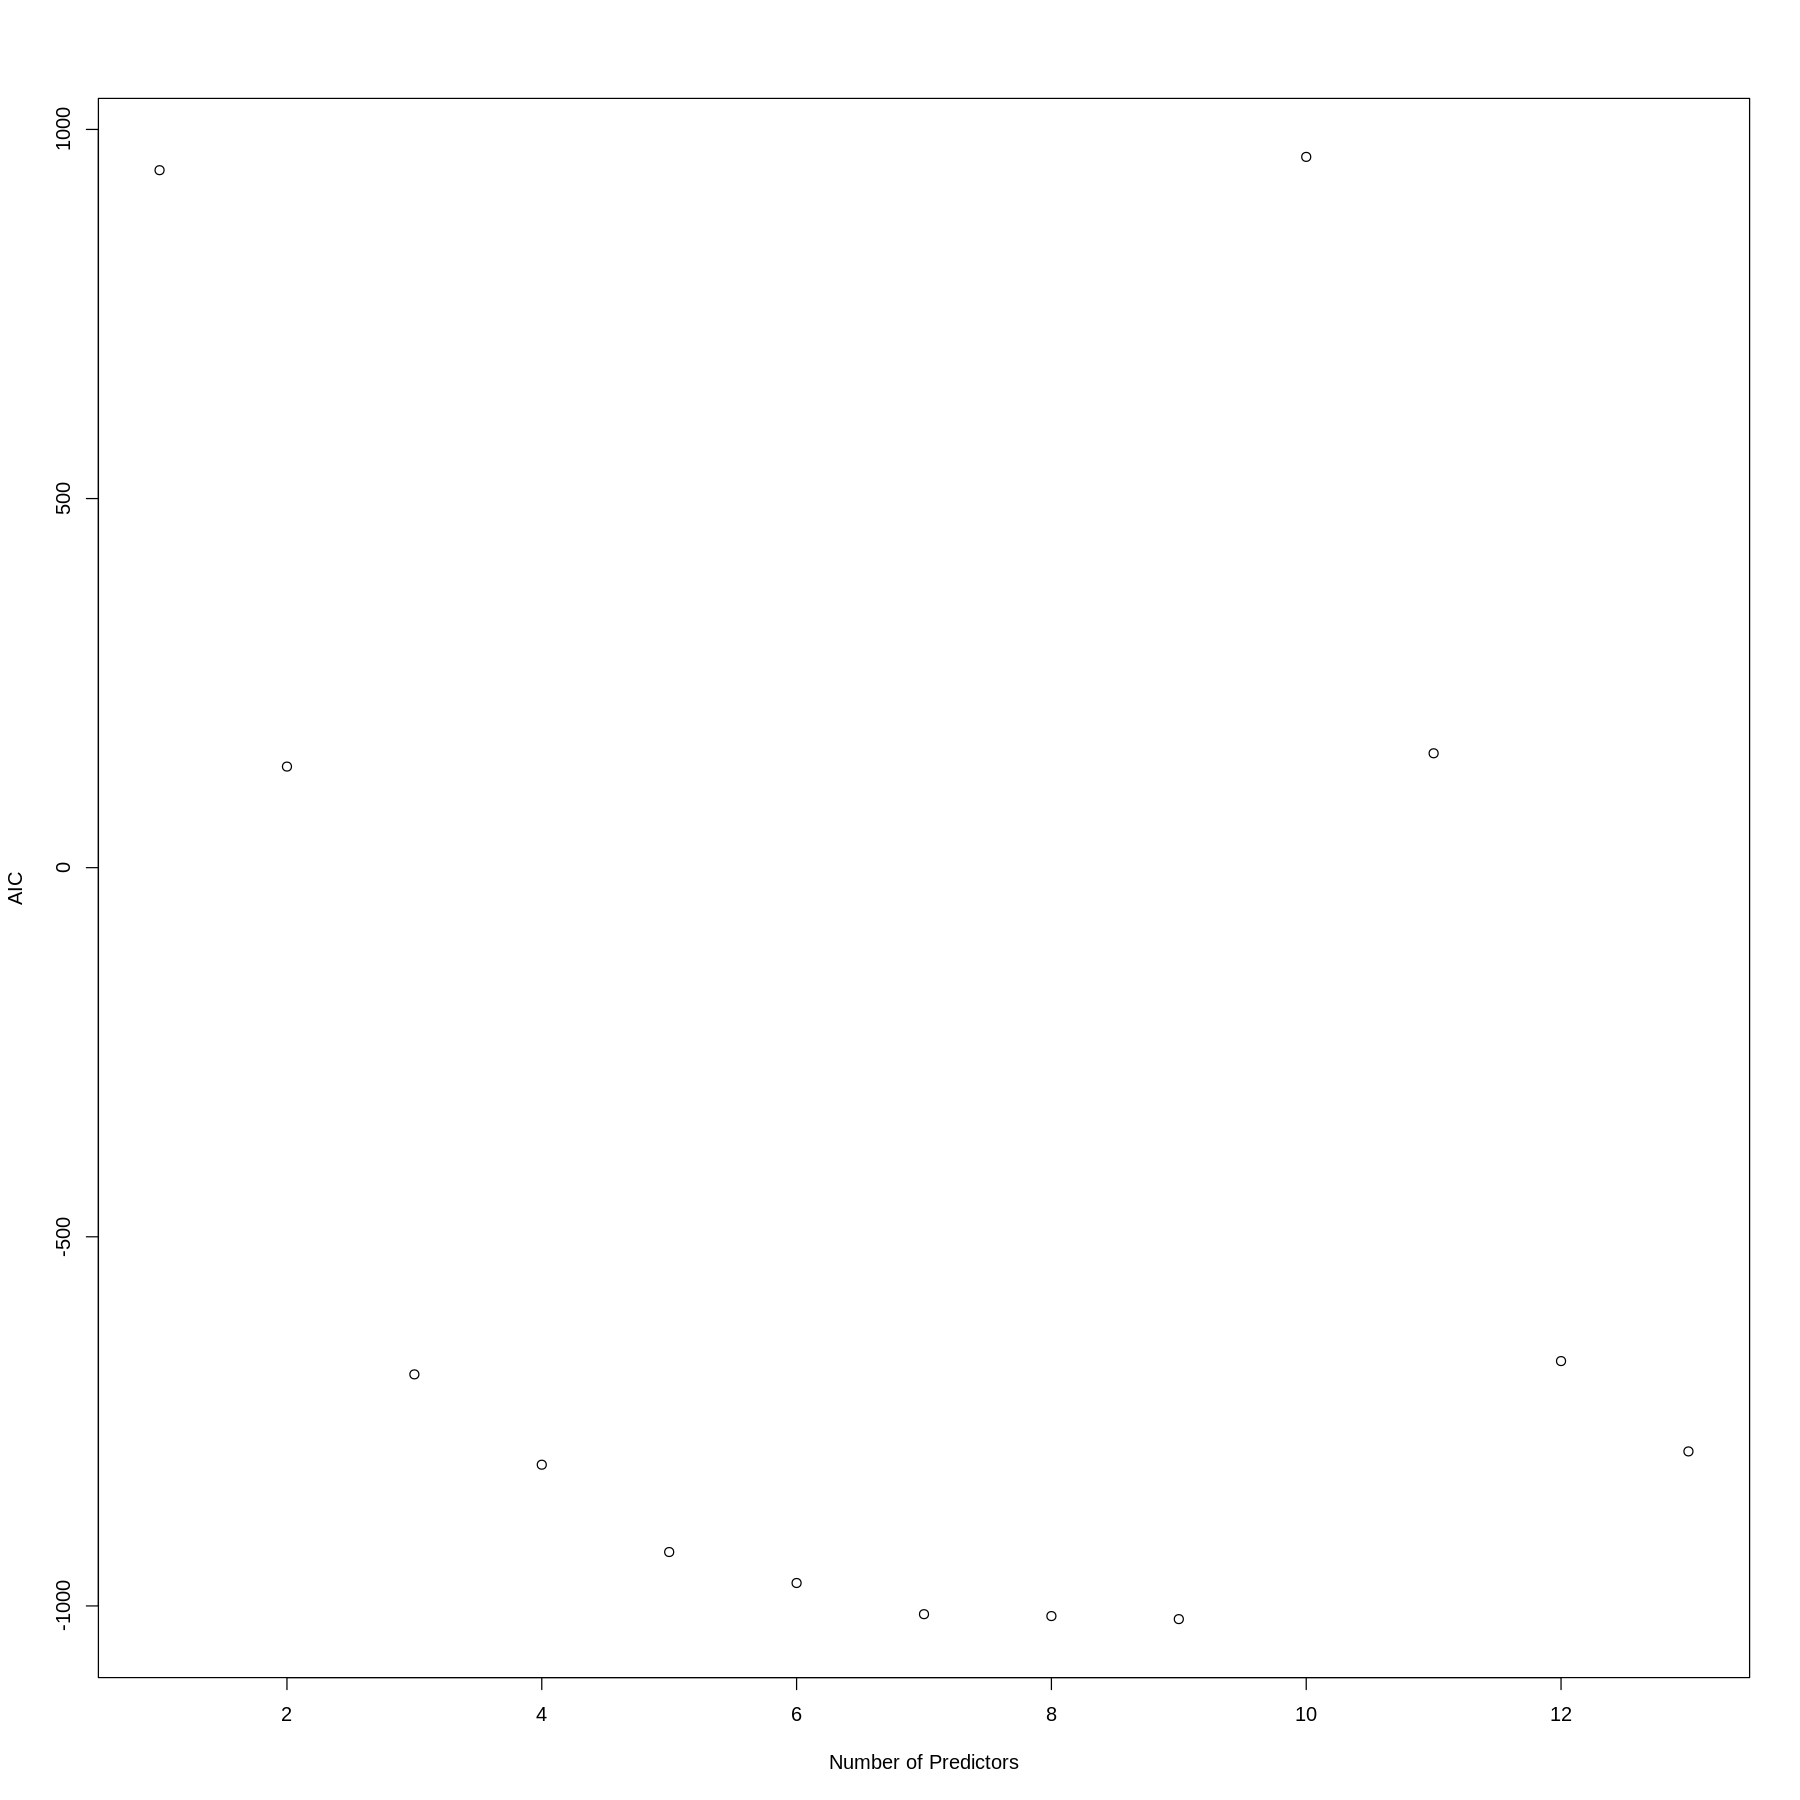

In [55]:
# getting the number of predictors for the best model using AIC
n = dim(train_new_1)[1];
AIC = 2*(2:14) + n*log(rs$rss/n)
plot(AIC ~ I(1:13), xlab = "Number of Predictors", ylab = "AIC")

It can be observed in the above plot that the best model size for the lowest AIC is $k=9$.

In [56]:
rs$adjr2

[1] 0.4342506 0.5313215 0.6131300 0.6240785 0.6343702 0.6380059 0.6416299
[8] 0.6419266 0.6423533

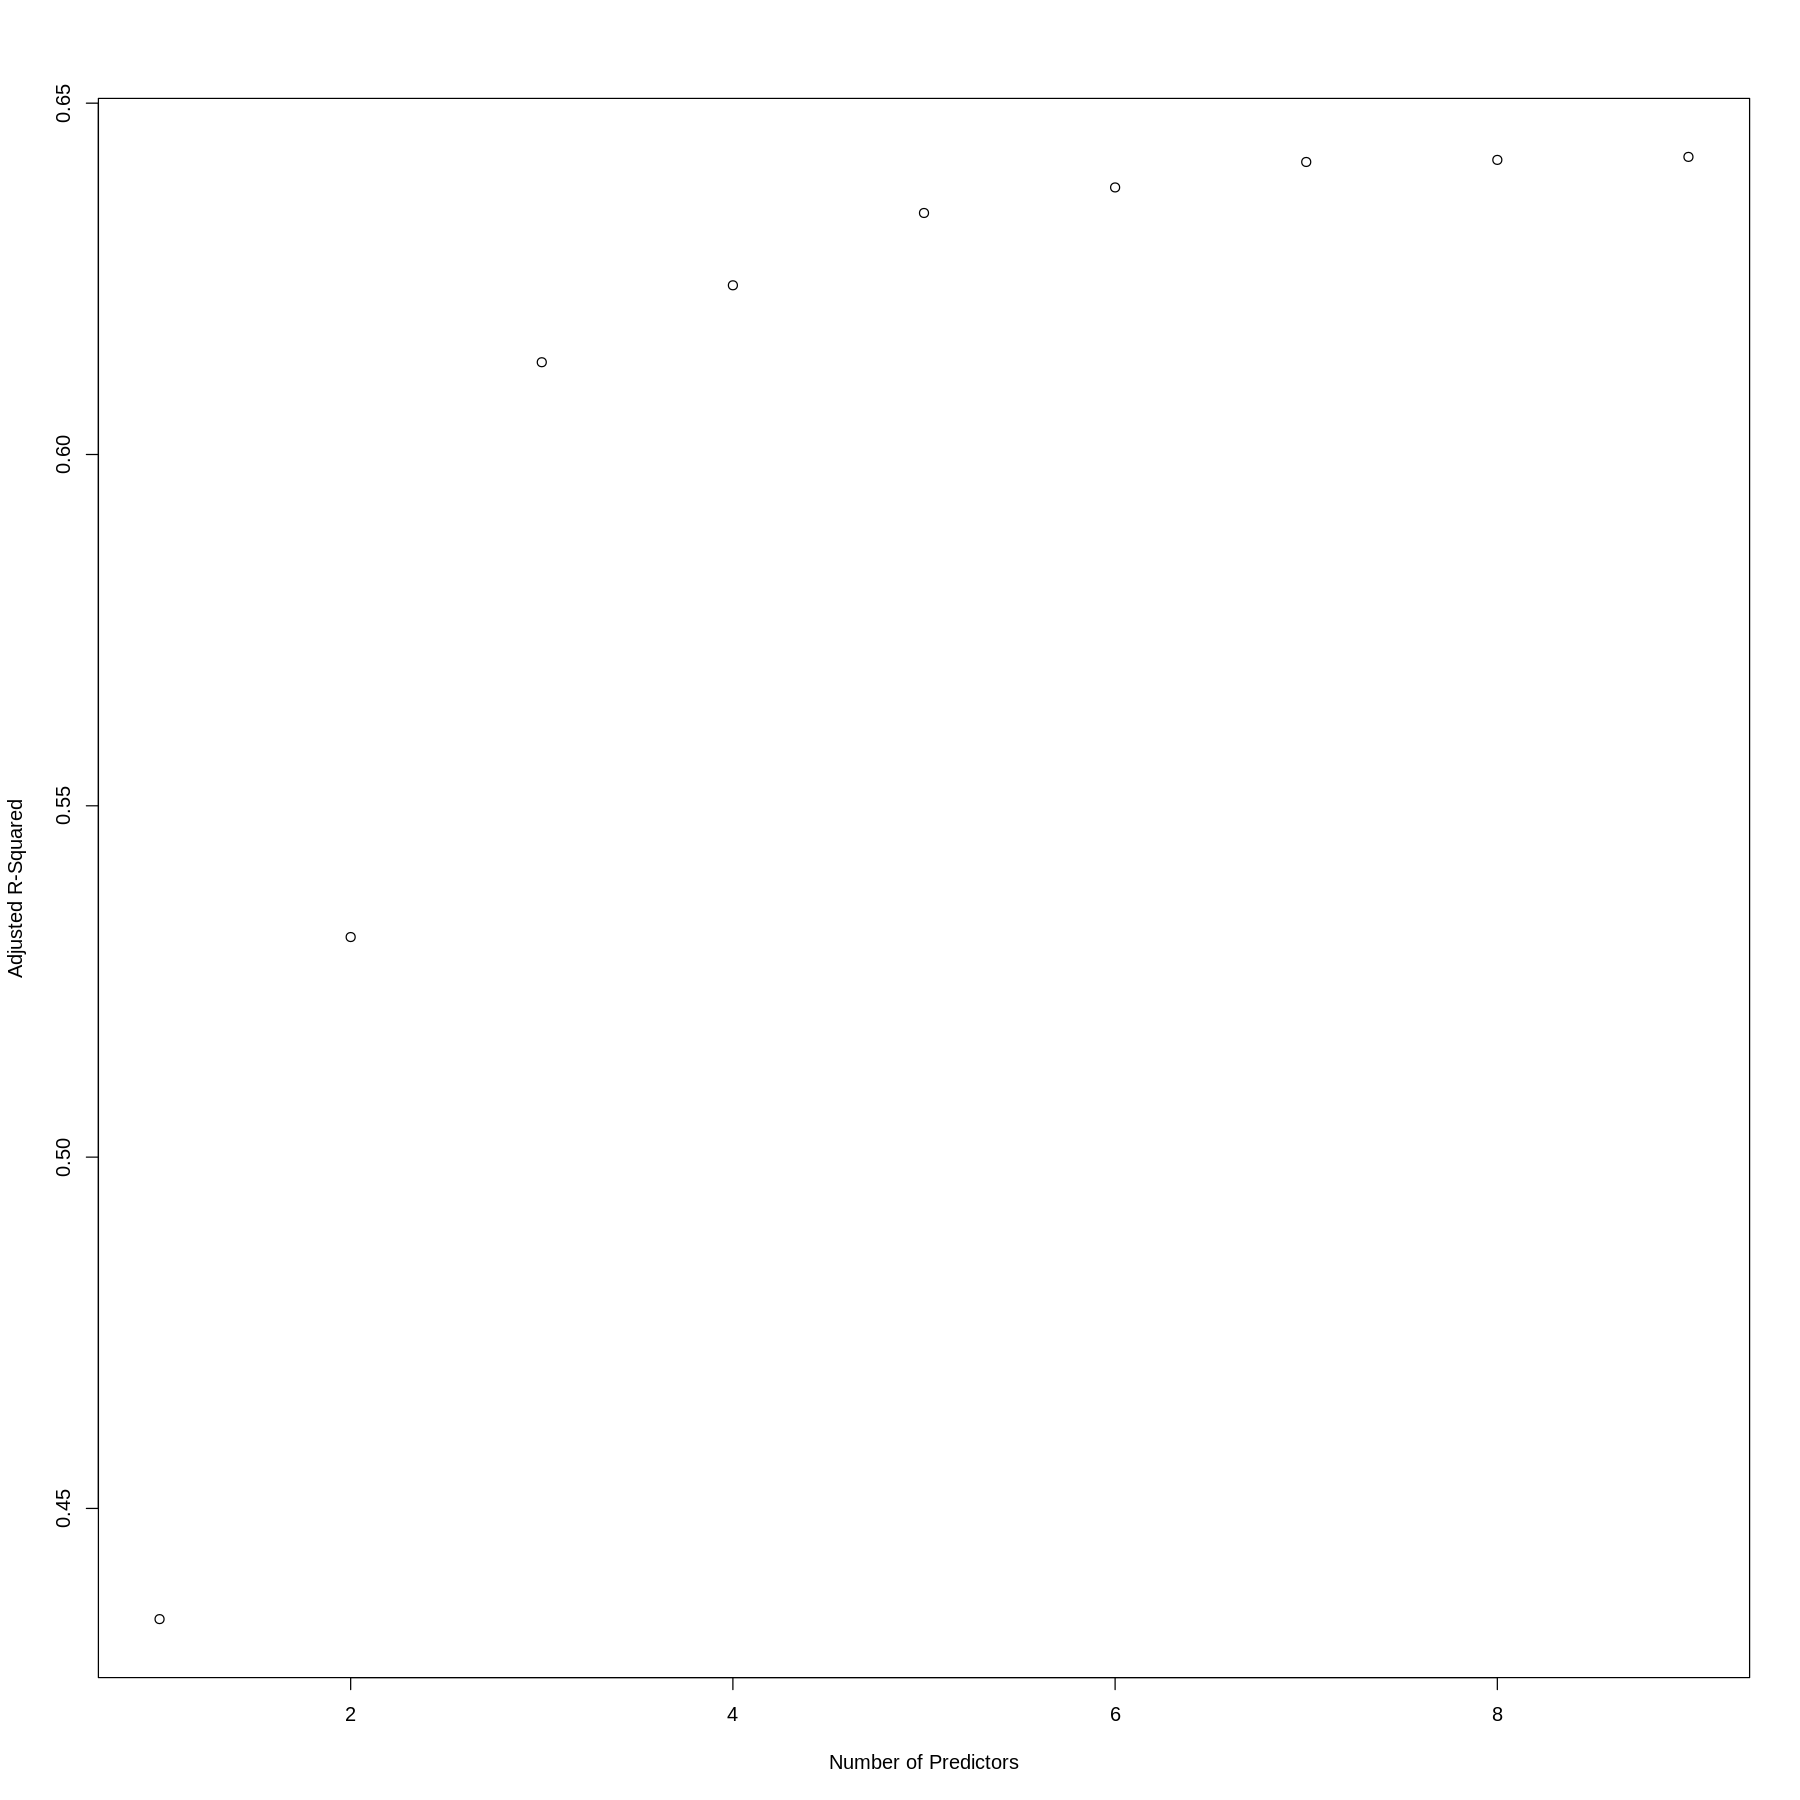

In [57]:
# getting the number of predictors for the best model using R2a
plot(1:9, rs$adjr2, xlab = "Number of Predictors", ylab = "Adjusted R-Squared")

It can be observed in the above plot that the best model size for the highest $R_a^2$ values is $k=9$.

Warning message in log(n) * (2:14) + n * log(rs$rss/n):
“longer object length is not a multiple of shorter object length”


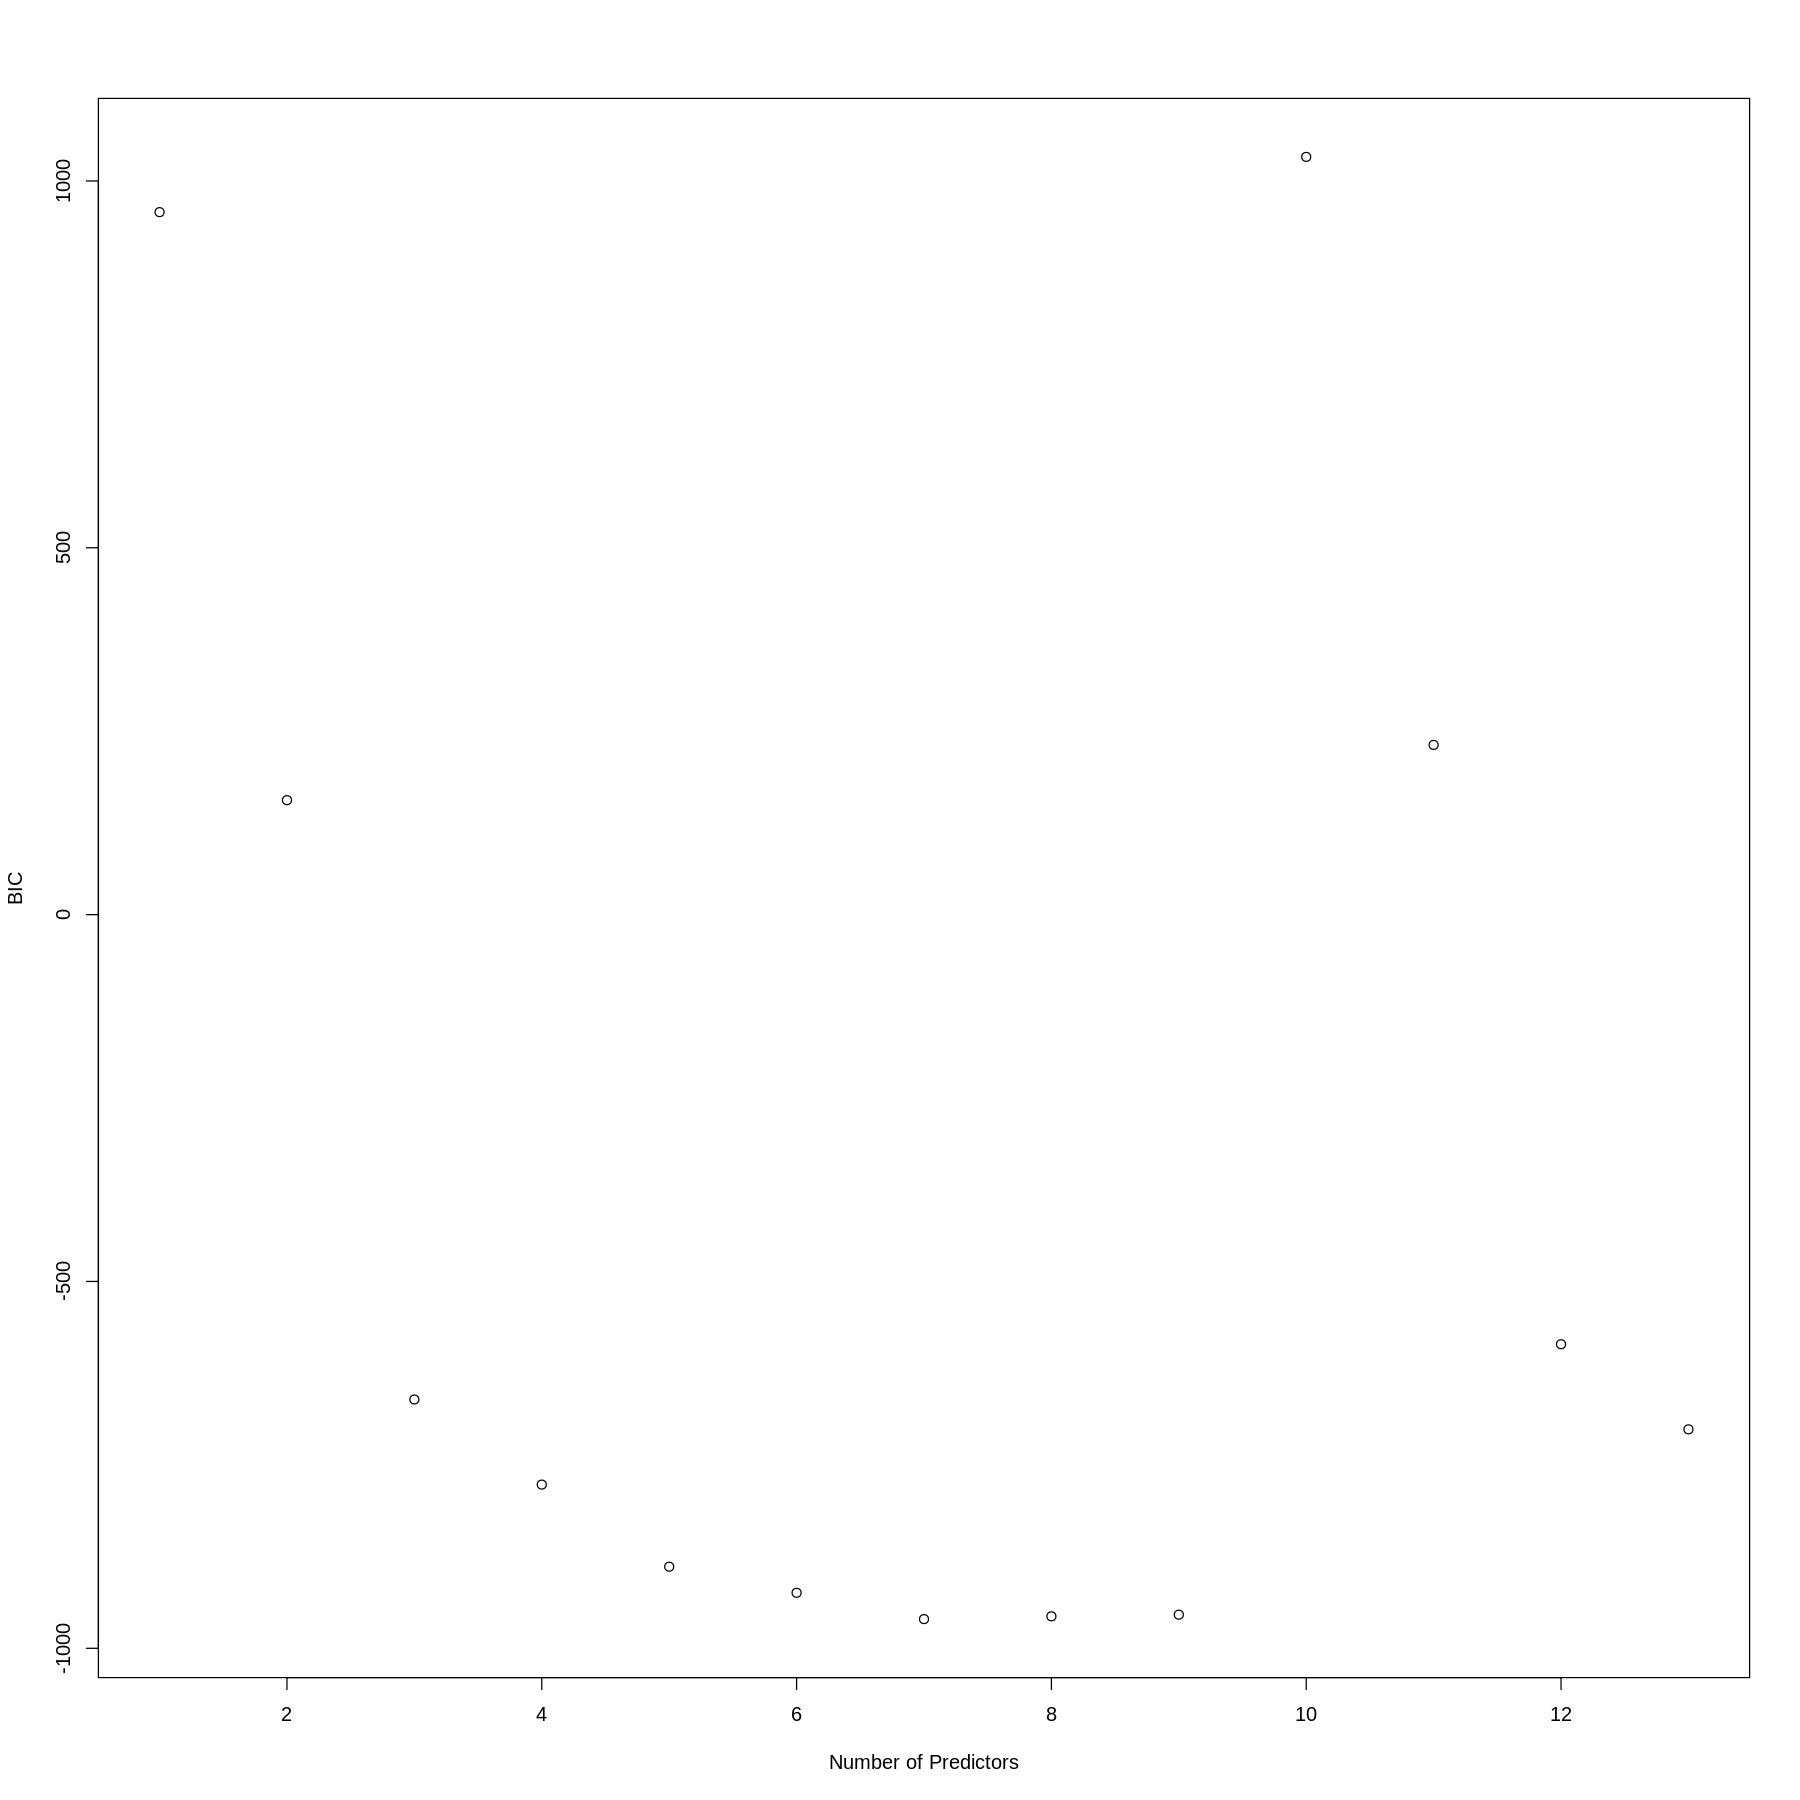

In [58]:
# getting the number of predictors for the best model using BIC
BIC = log(n)*(2:14) + n*log(rs$rss/n)
plot(BIC ~ I(1:13), xlab = "Number of Predictors", ylab = "BIC")

It can be observed in the above plot that the best model size for the lowest BIC is $k=7$.

We can see that out of the three criteria, **AIC** and **$R_a^2$** have the best models with size $k=9$ while the **BIC** criterion has the best model with size $k=7$. Therefore, we can proceed with the model with $k=9$ for regression modeling with the following equation:

`realSum` = $\widehat\beta_0 + \widehat\beta_1 \times$ `person_capacity` $ + \widehat\beta_2 \times$ `multi` $ + \widehat\beta_3 \times$ `biz` + $\widehat\beta_4 \times$ `cleanliness_rating` + $\widehat\beta_5 \times$ `bedrooms` + $\widehat\beta_6 \times$ `dist` + $\widehat\beta_7 \times$ `metro_dist` + $\widehat\beta_8 \times$ `room_type_encoded` + $\widehat\beta_9 \times$ `room_private_encoded`

In [59]:
# computing the MSPE for the above best model
model_wknds_fs <- lm(realSum ~ person_capacity + multi + biz + cleanliness_rating + bedrooms + dist + metro_dist + room_type_encoded + room_private_encoded, data = train_new_1)
predicted_values_fs <- predict(model_wknds_fs, newdata = test)
mspe_fs <- mean((test$realSum - predicted_values_fs)^2)
summary(model_wknds_fs)


Call:
lm(formula = realSum ~ person_capacity + multi + biz + cleanliness_rating + 
    bedrooms + dist + metro_dist + room_type_encoded + room_private_encoded, 
    data = train_new_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2084 -0.5447 -0.1420  0.3863  7.6961 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.65407    0.33155  -8.005 1.53e-15 ***
person_capacity        2.25210    0.10016  22.484  < 2e-16 ***
multi                  0.09575    0.03459   2.768  0.00566 ** 
biz                    0.09889    0.03491   2.833  0.00464 ** 
cleanliness_rating     0.92471    0.13317   6.944 4.40e-12 ***
bedrooms               0.63284    0.05185  12.204  < 2e-16 ***
dist                  -1.16990    0.05795 -20.187  < 2e-16 ***
metro_dist            -0.37275    0.05687  -6.554 6.27e-11 ***
room_type_encoded    -10.94478    1.00346 -10.907  < 2e-16 ***
room_private_encoded  16.26077    1.02801  15.818  < 2e-16 ***
---
Signif. 

### Comparison of MSPE values between backward selection and forward selection

In [60]:
cat("The mean square prediction error (MSPE) on the test dataset for the best model as computed in backward selection is: ", mspe_3)

The mean square prediction error (MSPE) on the test dataset for the best model as computed in backward selection is:  229556.4

In [61]:
cat("The mean square prediction error (MSPE) on the test dataset for the best model as computed in forward selection is: ", mspe_fs)

The mean square prediction error (MSPE) on the test dataset for the best model as computed in forward selection is:  229556.4

Therefore, for both type of model selection techniques, the MSPE values remain the same. Hence, the best model has been selected for regression modeling and predicting the prices of the Airbnb listings (`realSum`)

## ANOVA Testing

In [62]:
# perform ANOVA test
anova_result <- anova(model_wknds_fs)
print(anova_result)

Analysis of Variance Table

Response: realSum
                       Df Sum Sq Mean Sq   F value    Pr(>F)    
person_capacity         1 3708.3  3708.3 4710.4276 < 2.2e-16 ***
multi                   1   23.1    23.1   29.3838 6.264e-08 ***
biz                     1   41.0    41.0   52.1147 6.163e-13 ***
cleanliness_rating      1   50.4    50.4   64.0454 1.552e-15 ***
bedrooms                1    1.4     1.4    1.7328    0.1881    
dist                    1  931.1   931.1 1182.7272 < 2.2e-16 ***
metro_dist              1   74.4    74.4   94.4498 < 2.2e-16 ***
room_type_encoded       1 1054.7  1054.7 1339.7718 < 2.2e-16 ***
room_private_encoded    1  197.0   197.0  250.2023 < 2.2e-16 ***
Residuals            4287 3375.0     0.8                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Hypothesis Testing

### Distance vs. Listing Price

**Null Hypothesis**: There is no significant impact of the distance from the city center and the listing price.

**Alternative Hypothesis**: There is a significant impact of the distance from the city center and the listing price.

In [63]:
# testing the hypothesis using the regression coefficients of the optimized model `model_wknds_fs`
test_result <- summary(model_wknds_fs)$coefficients['dist', 'Pr(>|t|)']

# significance level is set as 0.01
if (test_result < 0.01) {
  cat("Reject the null hypothesis.")
} else {
  cat("Do not reject the null hypothesis.")
}

Reject the null hypothesis.

### Cleanliness Ratings vs. Listing Price

**Null Hypothesis**: There is no significant impact of the cleanliness ratings on the listing price.

**Alternative Hypothesis**: There is a significant impact of the cleanliness ratings on the listing price.

In [64]:
# testing the hypothesis using the regression coefficients of the optimized model `model_wknds_fs`
test_result_guest <- summary(model_wknds_fs)$coefficients['cleanliness_rating', 'Pr(>|t|)']

# significance level is set as 0.01
if (test_result_guest < 0.01) {
  cat("Reject the null hypothesis.")
} else {
  cat("Do not reject the null hypothesis.")
}

Reject the null hypothesis.

### Person Capacity vs. Listing Price

**Null Hypothesis**: There is no significant impact of the maximum person capacity of a room on the listing price.

**Alternative Hypothesis**: There is a significant impact of the maximum person capacity of a room on the listing price.

In [65]:
# Calculate Pearson's correlation coefficient
correlation <- cor(lon_wknds$person_capacity, lon_wknds$realSum)
print(correlation)

[1] 0.3841969


In [66]:
test_result <- cor.test(lon_wknds$person_capacity, lon_wknds$realSum)
if (test_result$p.value < 0.01) {
  cat("Reject the null hypothesis")
} else {
  cat("Do not reject the null hypothesis")
}

Reject the null hypothesis

### Room Type vs. Listing Price

**Null Hypothesis**: There is no significant difference in the prices between private rooms and shared rooms.

**Alternative Hypothesis**: There is a significant difference in the prices between private rooms and shared rooms.

In [67]:
# Subset the data for shared rooms
shared_rooms <- lon_wknds[lon_wknds$room_type == 3, "realSum"]

# Subset the data for private rooms
private_rooms <- lon_wknds[lon_wknds$room_type == 1, "realSum"]

# Perform a t-test
t_test_result <- t.test(shared_rooms, private_rooms)

# Print the t-test result
print(t_test_result)


	Welch Two Sample t-test

data:  shared_rooms and private_rooms
t = -2.1622, df = 32.441, p-value = 0.03808
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -84.730300  -2.551048
sample estimates:
mean of x mean of y 
 178.4475  222.0881 



# **Formal Report:**

- **Introduction:**

I am interested in looking into elements like guest and cleanliness ratings that have a big impact on price. Determining the critical elements is crucial because they provide the framework for enhancing the guest experience and optimizing all marketing tactics. The dataset was obtained via Kaggle datasets which was initially gathered by researchers to determine what factors influence pricing. With the use of statistical analysis on this dataset, I want to provide useful answers to the following questions: finding out the most influential factor on price listing, the difference in prices of different room types, and the effect of distance from the city center, cleanliness ratings, listings established for business purposes and maximum person capacity of rooms on the price of the listing.

- **Methods implemented and results:**

To facilitate computation and allow for the formation of correlation between the variables, data preprocessing was performed followed by splitting the dataset into training and testing data.

1. *Regression Modeling*:
Using `realSum` as the response variable and the other columns as predictor variables, we design a linear regression model in this section to check for underperforming predictors.

2. *Model Diagnostics*:
To verify modeling assumptions, including homoscedasticity, error normality, non-constant variances, and the existence of high leverage points, we generate diagnostic plots. Observations show that the model hardly fits into any of the categories. We perform a cube root data transformation to standardize the data, stabilize variance, and reinforce the model against outliers. Furthermore, we manually eliminated the outliers from the training dataset twice to fit the modeling assumptions.

3. *Model Selection*:
This operation is carried out using two techniques - backward and forward selection. For backward selection, the significance level is set as $\alpha_{crit} = 0.01$ and the model is updated till a point where the p-values of all the predictor variables are below $\alpha_{crit}$. In the case of forward selection, different selection criteria are implemented which resulted in the best model having **9** predictors. This can be determined using the `regsubsets()` function.

4. *ANOVA Testing*:
To find the most influential predictor variable in the best model selected previously, we conduct an ANOVA test and check which predictor has the highest `F-value` and the lowest `Pr(>f)` value. Consequently, `person_capacity` turned out to be the most influential predictor. It is also observed that listings established for business purposes influence pricing.

5. *Hypothesis Testing*:
Rejecting the null hypotheses indicates significant relationships between variables. The distance from the city center, cleanliness ratings, person capacity, and room type all impact listing prices in Airbnb accommodations, based on the conducted hypothesis tests.

- **Conclusions:**

The analysis reveals the significant impact of various factors on listing prices and its critical understanding for optimizing pricing strategies. Through this project, I learned the application of statistical methods for analyzing data and uncovering trends and insights of the dataset.

Future research could be conducted by exploring variables such as property amenities, seasonal trends, and neighborhood characteristics that influence pricing and investigating how those factors vary across different geographical locations.